In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
import datetime
import math
import matplotlib
import sklearn
from IPython.display import HTML
from IPython.display import YouTubeVideo

import pickle
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# print(f"Cufflinks version : cufflinks {cf.__version__}")
print(f"Plotly version : plotly {plotly.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

Numpy version : Numpy 1.26.4
Pandas version : Pandas 2.2.2
Matplotlib version : Matplotlib 3.7.5
Seaborn version : Seaborn 0.12.2
SkLearn version : SkLearn 1.2.2
Plotly version : plotly 5.22.0


In [2]:
df = pd.read_csv('../input/creditcarddata/creditcard.csv', encoding='latin_1')
df.columns = df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


The dataset in question contains features that have undergone Principal Component Analysis (PCA) transformation due to privacy concerns. The original features, labeled V1 through V28, likely represented sensitive information such as credit card numbers, expiration dates, security codes (CVV), cardholder names, transaction locations, and timestamps.

Two features remain untransformed:

'Time': This feature indicates the number of seconds that have passed between a given transaction and the initial transaction in the dataset.
'Amount': This represents the monetary value of each transaction. It's worth noting that this feature can be utilized in cost-sensitive learning approaches that take into account the specific characteristics of each example.

The target variable, labeled 'Class', is binary. It takes a value of 1 to indicate a fraudulent transaction and 0 for a legitimate one.

In [4]:
# Customising default values to view all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [5]:
#displaying the first 10 rows of the data
df.head(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
# checking the features and the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

**Highlights**

Dataset contains details of 284807 transactions with 31 features.

There is no missing data in our dataset, every column contain exactly 284807 rows.

All data types are float64, except 1: Class

All data types are float64, except 1: Class

28 columns have Sequential Names and values that don't make any logical sense - > V1, V2 ....V28

3 columns: TIME, AMOUNT and CLASS which can be analysed for various INSIGHTS!

Memory Usage: 67.4 MB, not so Harsh !!

In [7]:
# Counting the unique values of label
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

class
0    284315
1       492
Name: count, dtype: int64


class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


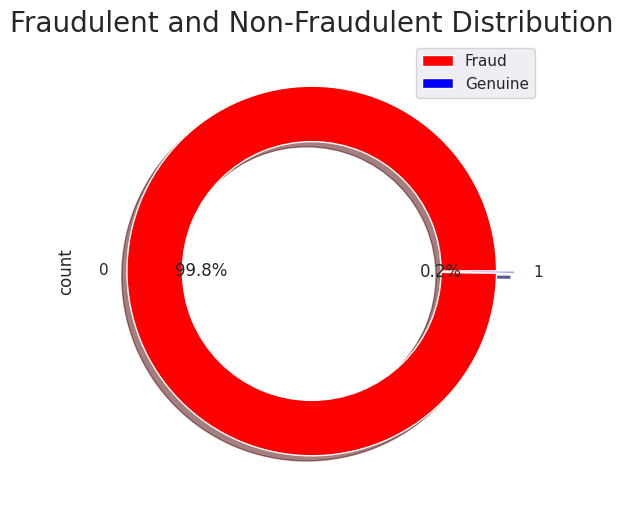

In [8]:
df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True,wedgeprops={'width': 0.3} , colors= ['red','blue'])
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"], loc="best")
plt.show()

**Highlights**

This dataset has 492 frauds out of 284,315 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [9]:
# Description of time and amount
df[['time', 'amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


**Highlights**

On an average, credit card transaction is happening at every 94813.86 seconds.

Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0 and the maximum amount 25,691.16. By seeing the 75% and the maximum amount, it looks like the feature 'Amount' is highly positively skewed. We will check the distribution graph of the amount to get more clarity.


In [10]:
# Dealing with missing data
df.isnull().sum().max()

0

Therefore, there are no missing data present in the dataset.

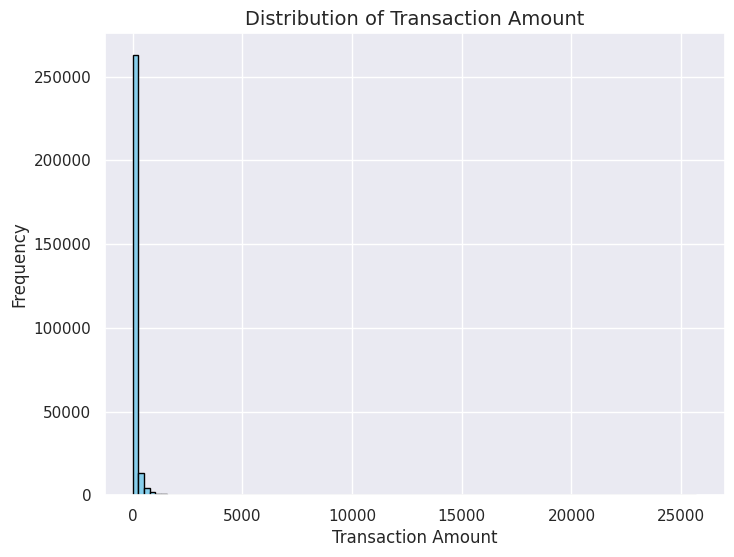

In [11]:
#Plotting a histogram to show the distribution of amount
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.hist(df['amount'], bins=100, color='skyblue', edgecolor='black') 
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

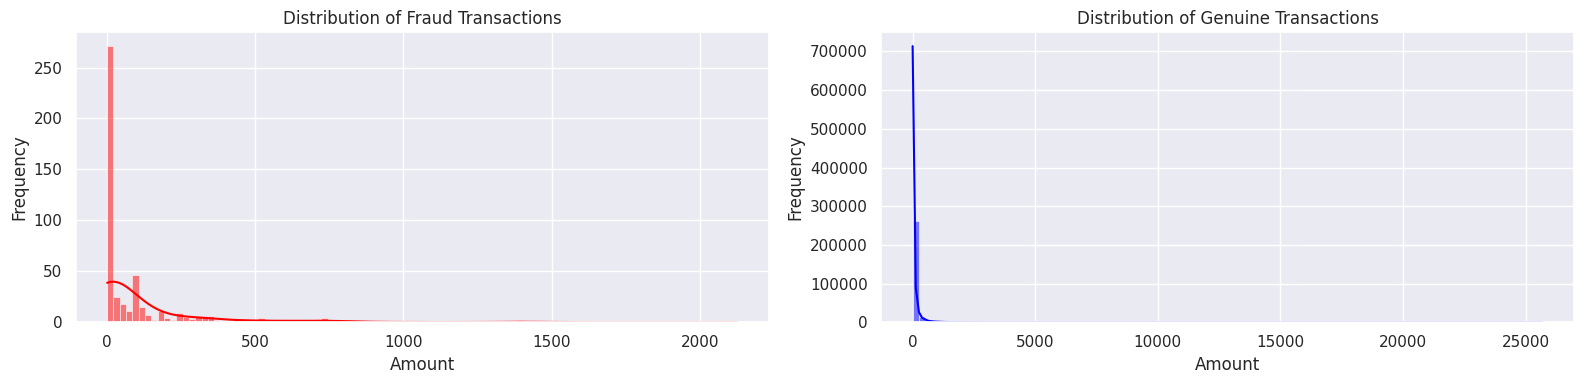

In [12]:
# Plotting a histogram to show the distribution of amount for fradulent & genuine transactions
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))

# Fraud Transactions
sns.histplot(df[df['class'] == 1]['amount'], bins=100, ax=axs[0], kde=True, color='red')  
axs[0].set_title("Distribution of Fraud Transactions")
axs[0].set_xlabel("Amount")
axs[0].set_ylabel("Frequency")

# Genuine Transactions
sns.histplot(df[df['class'] == 0]['amount'], bins=100, ax=axs[1], kde=True, color='blue')  
axs[1].set_title("Distribution of Genuine Transactions")
axs[1].set_xlabel("Amount")
axs[1].set_ylabel("Frequency")

plt.tight_layout() 
plt.show()

In [13]:
#printing the fraud transaction distribution
print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


In [14]:
# printing the Genuine transaction distribution
print("Genuine Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].min())

Genuine Transaction distribution : 
 amount
1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: count, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


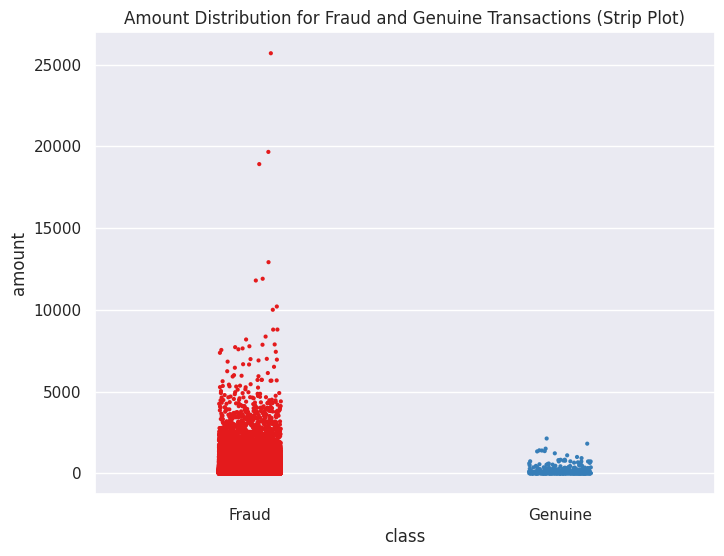

In [15]:
# Distribution of amount with respect to class
plt.figure(figsize=(8,6))
sns.stripplot(x='class', y='amount', data=df, jitter=True, palette="Set1", size=3)
plt.title('Amount Distribution for Fraud and Genuine Transactions (Strip Plot)')
plt.xticks([0, 1], ['Fraud', 'Genuine'])
plt.show()

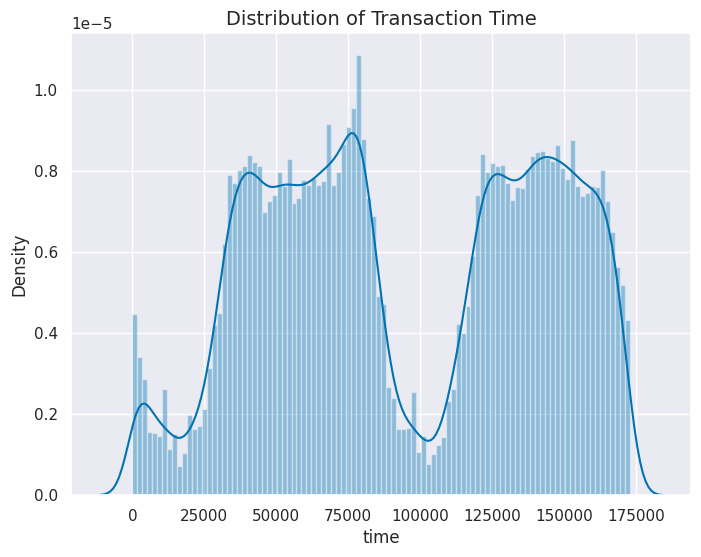

In [16]:
# Distribution of Time
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

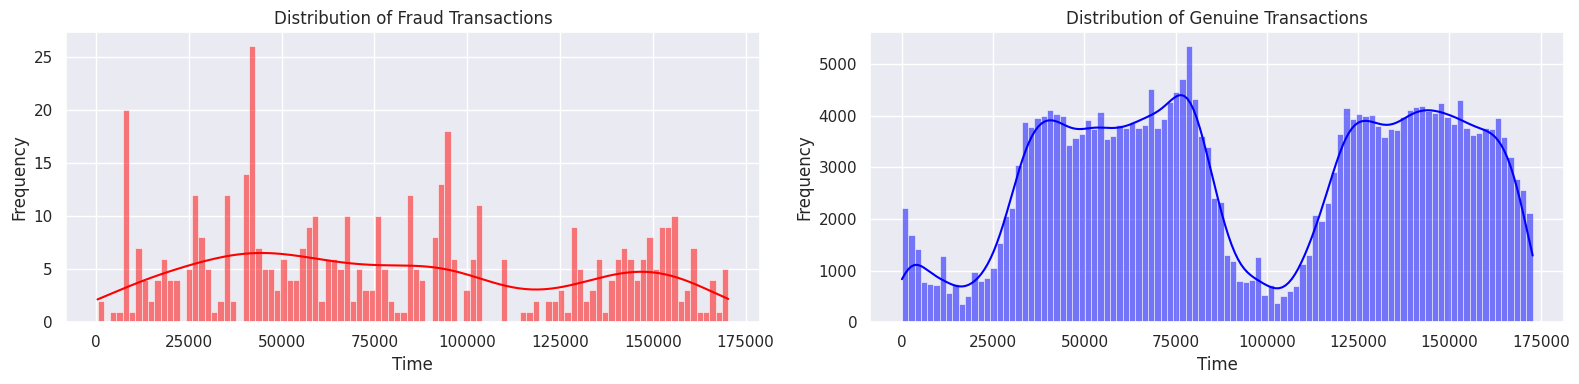

In [17]:
# Distribution of time w.r.t. transactions types
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))

# Fraud Transactions
sns.histplot(df[df['class'] == 1]['time'], bins=100, color='red', kde=True, ax=axs[0])  
axs[0].set_title("Distribution of Fraud Transactions")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Frequency")

# Genuine Transactions
sns.histplot(df[df['class'] == 0]['time'], bins=100, color='blue', kde=True, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

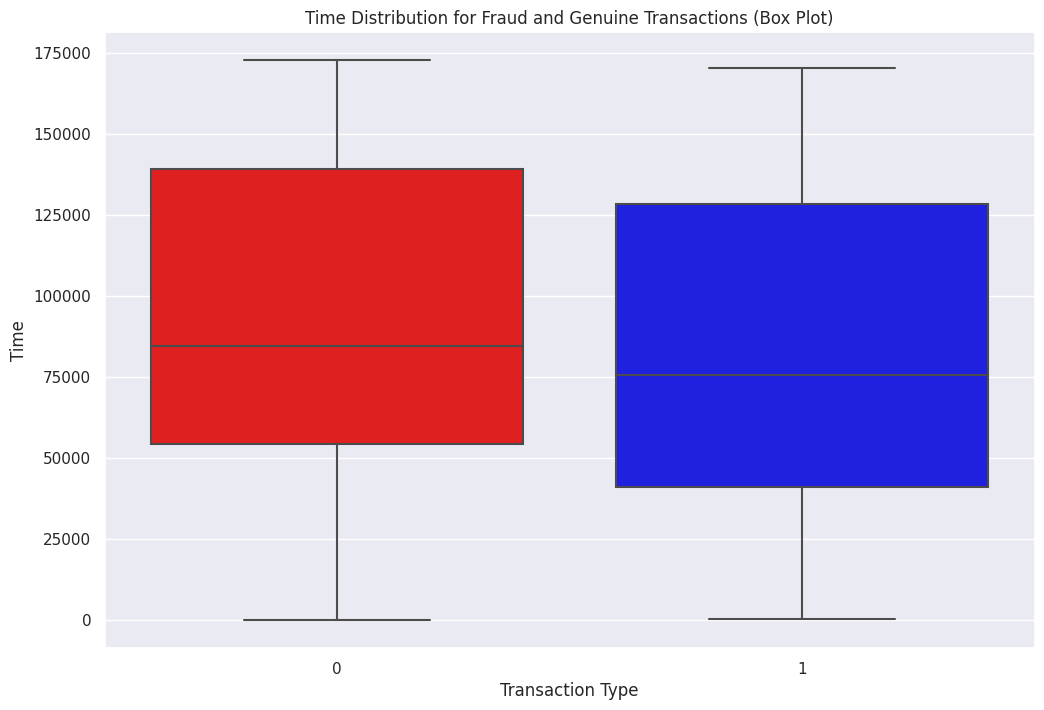

In [29]:
# Plotting Time Distribution for Fraud and Genuine Transactions 
plt.figure(figsize=(12,8))
sns.boxplot(x='class', y='time', data=df, palette=['red', 'blue'])
plt.title('Time Distribution for Fraud and Genuine Transactions (Box Plot)')
plt.xlabel('Transaction Type')
plt.ylabel('Time')
plt.show()

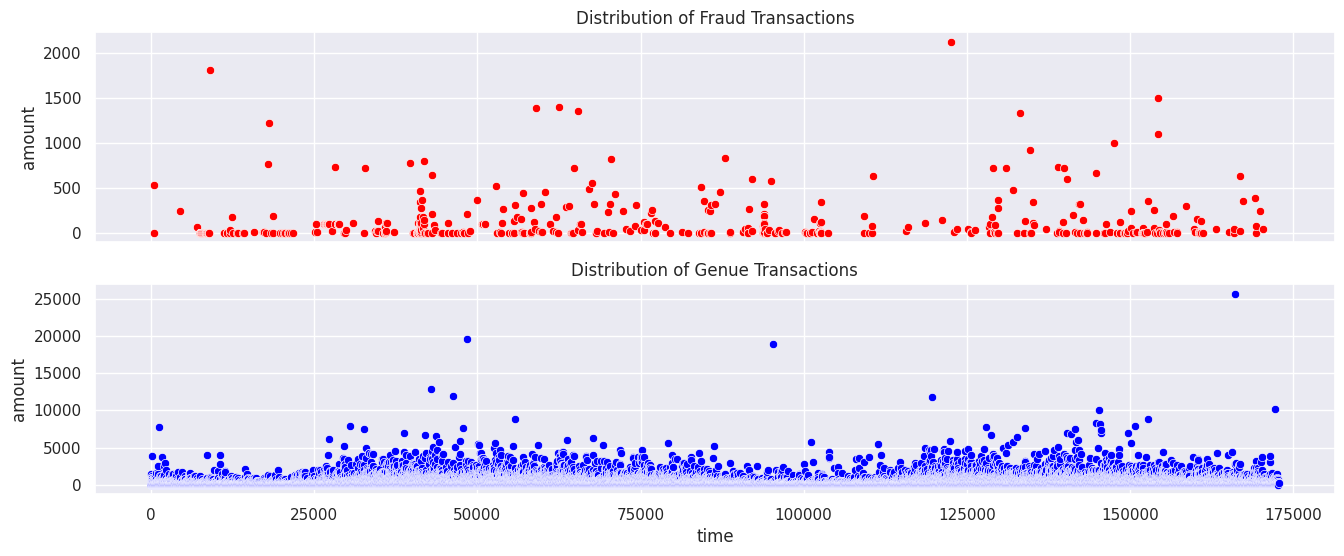

In [31]:
# Distribution of transaction type w.r.t amount
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

# Fraud Transaction
sns.scatterplot(x='time',y='amount', data=df[df['class']==1], ax=axs[0], color='red')
axs[0].set_title("Distribution of Fraud Transactions")

#Genue Transaction
sns.scatterplot(x='time',y='amount', data=df[df['class']==0], ax=axs[1], color='blue')
axs[1].set_title("Distribution of Genue Transactions")

plt.show()